# Laboratorio 3.2: Clustering

**Autores:** Hernán Sarmiento, Andrés Abeliuk, Alison Fernandez, Cinthia Mabel Sanchez, Johnny Godoy, Gabriel Ramos, Cristian Llull y Matías Rojas

**Fecha:** Octubre 2021

## ============= Declaración de compromiso ético =============

Nosotros ****Ignacio Díaz y Millaray Valdivia**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 2) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura del laboratorio

Este laboratorio consiste en 2 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección para evaluar los métodos de clustering.

# Parte 1: Teoría

**1.** Explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

> **Respuesta:**
Tomando en cuenta que para K clusters, la forma de escoger los K clusters reales es cada vez menor a medida que aumenta K, Bisecting k-means lo que hace es partir siempre con 2 clusters, de esta manera esa probabilidad es más alta (1/2). Y si se itera varias veces esa misma búsqueda de dos clusters y nos quedamos con el que tenga el mejor resultado (aquí tenemos que definir cómo medimos cuál es mejor, hay varias formas, pero podemos suponer una medida como SSE) la probabilidad de haber encontrado el patrón, en el caso que el K efectivamente sea 2, es muy alta. Luego, podemos tomar el cluster con menor rendimiento en la medida que elegimos y volver a realizar el mismo método de correr k-means con K=2 varias veces. Esta solución aumenta la probabilidad de encontrar los clusters reales.

**2.** Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
    >**Respuesta:** Desventaja: No es robusto a outliers. Ventaja: Es bueno reconociendo cluster circulares cuando se mide el rendimiento con SSE, ya que evalua cercanía con la distancia euclidiana.
* Clustering Jerarquico Aglomerativo
    >**Respuesta:** Ventaja: No hay que elegir el número de clusters antes de usarlo. Desventaja: Sensible a ruidos y a outliers.

**3.** Evaluar clusters no es una tarea fácil. Qué formas de evaluar clusters conoce? Nombre 3 formas de validación y describa cómo podría determinar si los cluters son buenos o malos usando cada una de las formas nombradas.
> **Respuesta:**
Un método de validación interna es ver la cohesión y separación de los clusters. Para cohesión existe SSE que es la suma de la distancias cuadradas dentro del clusters. Y para separación usamos BSS que es la suma de las distancias entre clusters. Un bajo SSE y un alto BSS validaría un buen cluster.
Dos métodos de validación externa son entropía y pureza, que teniendo datos etiquetados, la entropía mide la cantidad de clases diferentes que contiene un cluster. Y la pureza mide el nivel en que un cluster contiene elementos de la clase predominante. Entonces, queremos que la entropía se baja para que un cluster represente de mejor manera una clase, y queremos que la pureza sea alta, en que un cluster tenga la mayor cantidad de elementos de una clase.

# Parte 2: Clustering

Para esta parte del Laboratorio vamos a evaluar dos métodos de clustering: `k-means` y `dbscan`. Ejecute las siguientes líneas para descargar y seleccionar los datos.

In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("http://users.dcc.uchile.cl/~hsarmien/mineria/datasets/d31.txt", sep="\t", names = ["V1", "V2"])
X = pd.DataFrame(dataframe).to_numpy()
X

array([[25.0514,  5.7475],
       [26.6614,  7.3414],
       [25.2653,  6.2466],
       ...,
       [ 5.276 , 17.2475],
       [ 6.4444, 16.2033],
       [ 7.162 , 18.1836]])

## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente el método del codo.

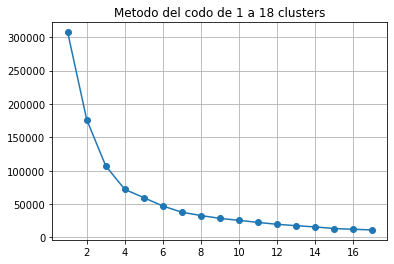

In [5]:
# Respuesta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def n_clusters_plot(X, n_cluster):
    sse = []

    clusters = list(range(1, n_cluster))
    for k in clusters:
        kmeans = KMeans(n_clusters=k).fit(X)
        sse.append(kmeans.inertia_)

    plt.plot(clusters, sse, marker="o")
    plt.title(f"Metodo del codo de 1 a {n_cluster} clusters")
    plt.grid(True)
    plt.show()

    
n_clusters_plot(X, 18)

**2.** Cuántos clusters propone usar para este dataset? Escoja **dos opciones** y justifique su elección.

> **Respuesta:**
Elegimos 4 y 5 porque desde ahí parece empezar a estabilizarse la pendiente de la curva.

**3.** Genere un gráfico para cada uno de los **dos `k` elegidos** para tener una representación visual de los clusters.

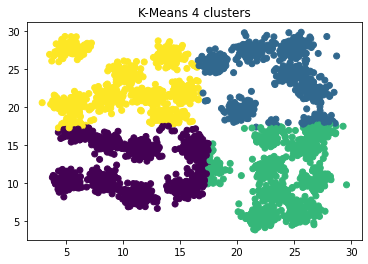

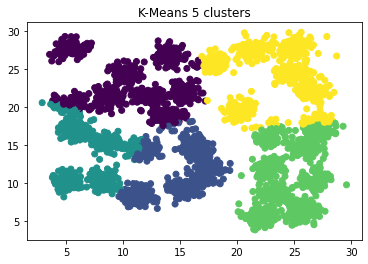

In [60]:
# Respuesta

n_clusters = 4
kmeans_4c = KMeans(n_clusters=n_clusters).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_4c.labels_)
plt.title(f"K-Means {n_clusters} clusters")
plt.show()


n_clusters2 = 5
kmeans_5c = KMeans(n_clusters=n_clusters2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_5c.labels_)
plt.title(f"K-Means {n_clusters2} clusters")
plt.show()

## DBSCAN

**1.** Usando los datos anteriores, ejecute DBSCAN y genere un gráfico con los clusters obtenidos. Use los parámetros `eps=0.9`y `min_samples=5`.

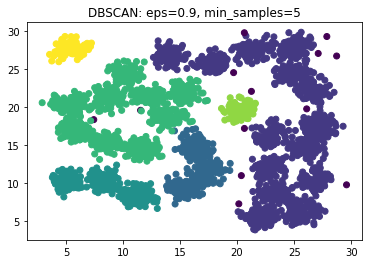

In [49]:
# Respuesta

from sklearn.cluster import DBSCAN

eps = 0.9
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

**2.** Estime el valor `eps` usando el método de la rodilla (basado en KNN). La idea de este procedimiento es calcular la distancia promedio de cada punto a sus `k` vecinos más cercanos los cuales son graficados en orden ascendente. El objetivo es determinar la _rodilla_, que corresponde al valor óptimo de `eps`. Pruebe varios valores de `y` utilizando el siguiente código y adjunte el gráfico para el mejor `y` que usted considere. Explique porque escogio el valor `y` como mejor opción.

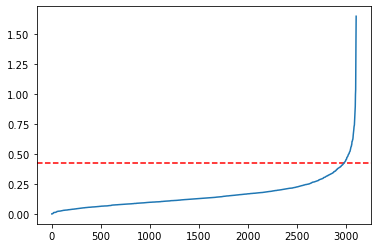

In [48]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.43, color='r', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.plot(distances)

> **Respuesta:** Elegimos el eps en 0.43 porque buscamos el punto en que la distancia promedio al k-ésimo vecino da el mayor salto. 

**3.**  Ejecute y grafique los clusters usando el método DBSCAN haciendo uso de parámetro `eps` (`y`) encontrado previamente.

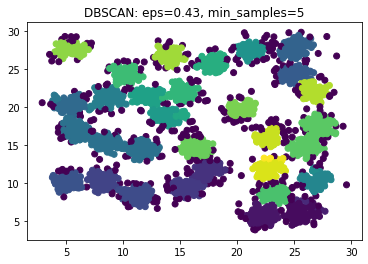

In [67]:
# Respuesta

eps_2 = 0.43
min_samples_2 = 5

dbscan2 = DBSCAN(eps=eps_2, min_samples=min_samples_2).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan2.labels_)
plt.title(f"DBSCAN: eps={eps_2}, min_samples={min_samples_2}")
plt.show()

## Evaluación

**1.** Para evaluar clusters existen una serie de métodos y métricas. Para este laboratorio usaremos el coeficiente de Silhouette. Para cada uno de los experimentos (los dos de la parte de `kmeans` en la pregunta **3** y los dos de la parte de `dbscan` en la pregunta **1** y **3**), adjunte el código que permita obtener el Silhouette score de los modelos.

In [68]:
# Respuesta

from sklearn.metrics import silhouette_score


print("Dataset X K-Means con 4 clusters\t", silhouette_score(X, kmeans_4c.labels_))
print("Dataset X K-Means con 5 clusters\t", silhouette_score(X, kmeans_5c.labels_))
print("Dataset X DBSCAN con 0.9 eps    \t", silhouette_score(X, dbscan.labels_))
print("Dataset X DBSCAN con 0.43 eps   \t", silhouette_score(X, dbscan2.labels_))


Dataset X K-Means con 4 clusters	 0.427592428453236
Dataset X K-Means con 5 clusters	 0.4113053198821532
Dataset X DBSCAN con 0.9 eps    	 0.08056489865268891
Dataset X DBSCAN con 0.43 eps   	 0.3487366940645789


**2.** En base a los valores del coeficiente de Silhouette obtenidos para cada método y configuración. ¿Cuál cree que es el que tiene mejor resultado? Comente al respecto basándose principalmente en los resultados.

>**Respuesta:** Si nos basamos puramente en el coeficiente de Silhouette, k-means con 4 clusters obtiene el mejor rendimiento. Comparándolo con k-means de 5 clusters, indica que con 4 se alcanza mejor cohesión-separación. Pero es engañoso compararlo con los resultados de DBSCAN. Si analizamos los resultados de DBSCAN, es notorio que con el eps obtenido con el método de la rodilla se alcanza mejor cohesión-separación que con el eps inicial de 0.9. Pero tiene un rendimiento menor al de k-means, lo que es engañoso, pues para el resultado de DBSCAN con 0.43, al haber más clusters, el que tiene la distancia promedio menor al cluster que se evalúa es menor que en k-means, donde el cluster con la distancia promedio menor a cierto cluster es más alto, pues los clusters son menos y están repartidos en todo el cuadrante. Eso hace que al caluclar s = (b-a)/max(a,b), b sea mayor para k-means y lo que terminaría generando un s mayor. Pero si analizamos los gráficos, en este caso k-means sólo divide los puntos en 4 cuadrantes porque por la distribución de los puntos, con la medida de SSE no se logra captar los patrones de agrupamiento. En cambio con DBSCAN, que valora más la densidad de los clusters, se aprecia que los clusters tiene un patrón de agrupamiento en base a densidad. 